# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in a attempt to build a machine larning model capable of predicting whether or not someone has heart disease based on their medical attributes. 

Fallowing Approches: 
1. Problem Definiton 
2. Data 
3. Evaluation
4. Features
5. Modelling 
6. Expreimentation

**Data Dictionary**

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type

    -- Value 0: typical angina
    
    -- Value 1: atypical angina
    
    -- Value 2: non-anginal pain
    
    -- Value 3: asymptomatic
    
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* and the label
* condition: 0 = no disease, 1 = disease

**Sckit-learn Algrotihm Cheat-Sheet**
    : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# Preparing the tools
We are going to use pandas, Matplotlib, and NumPy for data analaysis and manipulation 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Plotting to appear inside the notebook
%matplotlib inline 

#For the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#For the model evulations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("Data/Heart_disease_cleveland_new.csv")
df.shape

(303, 14)

# Data Exploration 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:

df["target"] 


# We found the type of the classification by counting the target values that about the heart disease: Balanced Classification 

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64

<Axes: >

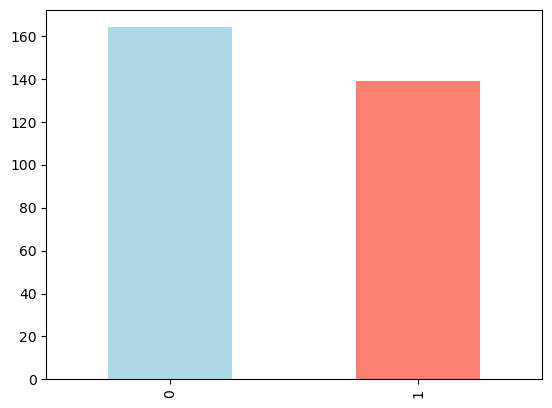

In [5]:
df["target"].value_counts().plot(kind="bar", color = ["lightblue", "salmon"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [8]:
df["sex"].value_counts()

1    206
0     97
Name: sex, dtype: int64

<Axes: >

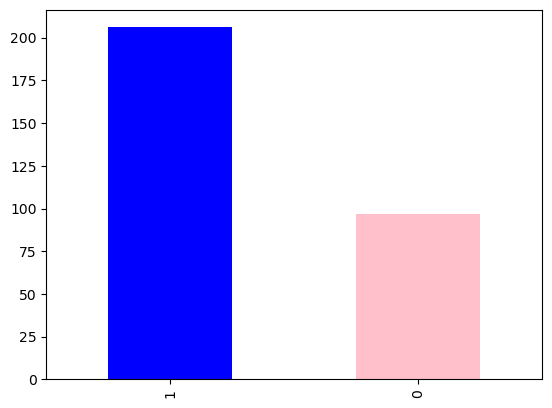

In [9]:
df["sex"].value_counts().plot(kind = "bar", color = ["blue", "pink"])

In [10]:
# Compare the target column with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,72,92
1,25,114


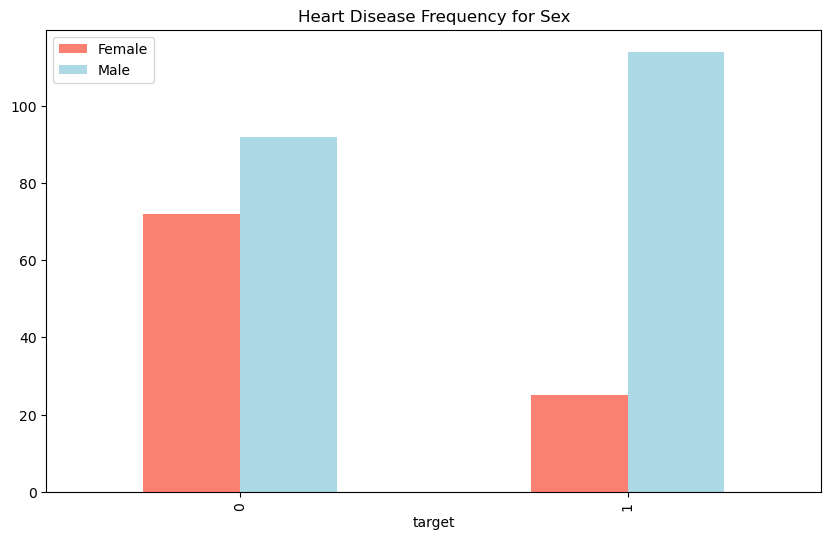

In [11]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", 
                                   figsize = (10, 6),
                                   color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.legend(["Female","Male"])

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [13]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
150     7
       ..
177     1
127     1
97      1
190     1
90      1
Name: thalach, Length: 91, dtype: int64

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


## Age vs. max Heart Rate Disease

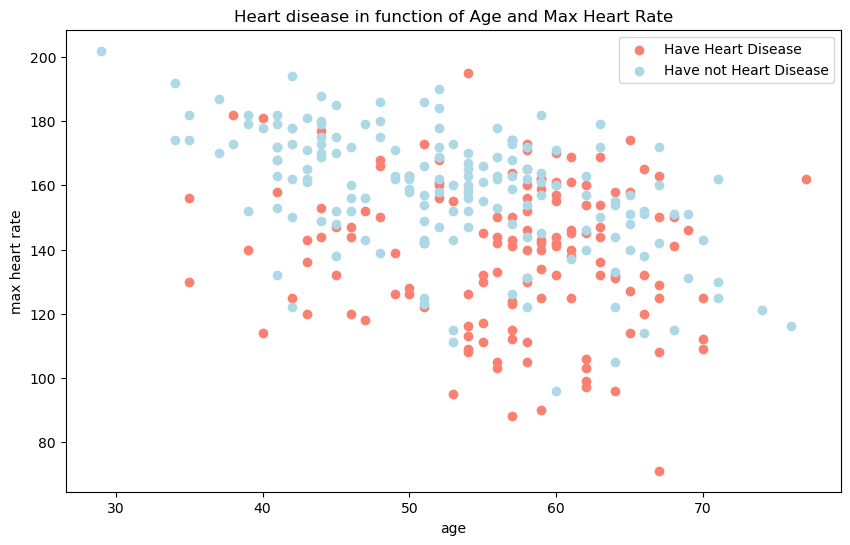

In [15]:
plt.figure(figsize=(10, 6))
# For tha people who have heart disease 
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           color ="salmon")
# For tha people who have not heart disease 
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           color ="lightblue")

plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["Have Heart Disease","Have not Heart Disease"])


<Axes: ylabel='Frequency'>

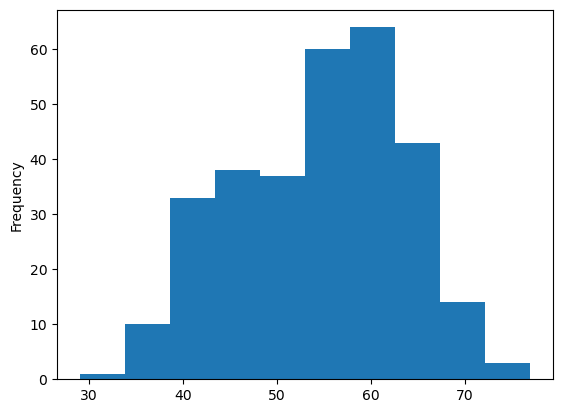

In [16]:
df.age.plot.hist()

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,16,7
1,41,9
2,68,18
3,39,105


### Heart Disease Frequency per Chest Pain Type 
* cp: chest pain type

    -- Value 0: typical angina
    
    -- Value 1: atypical angina
    
    -- Value 2: non-anginal pain
    
    -- Value 3: asymptomatic

<Axes: xlabel='cp'>

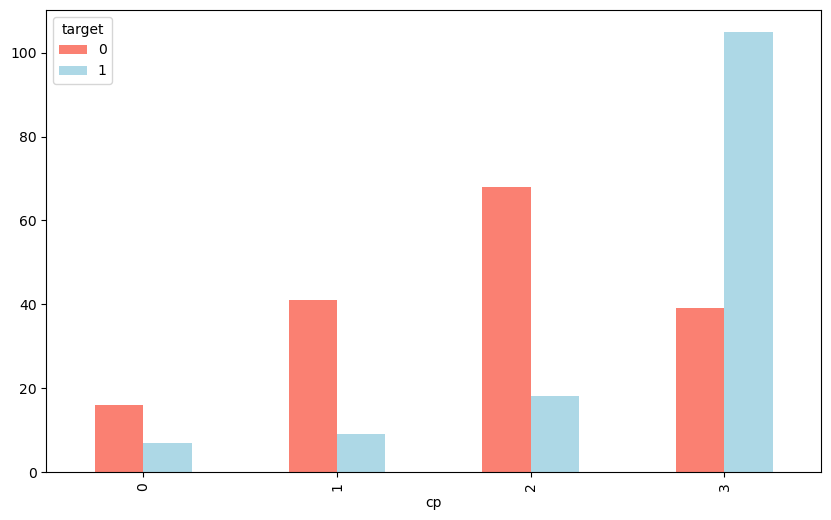

In [18]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", 
                                  figsize = (10,6),
                                  color = ["salmon", "lightblue"])

## Make a correlation matrix: 
**It is a table that measures the strength and direction of the relationship between two or more variables. It measures the correlation matrix coefficient formed between each pair; There is a strong relationship bond between couples whose multiples are less than one.**

**In negative correlation: there are negative reality between each other.**


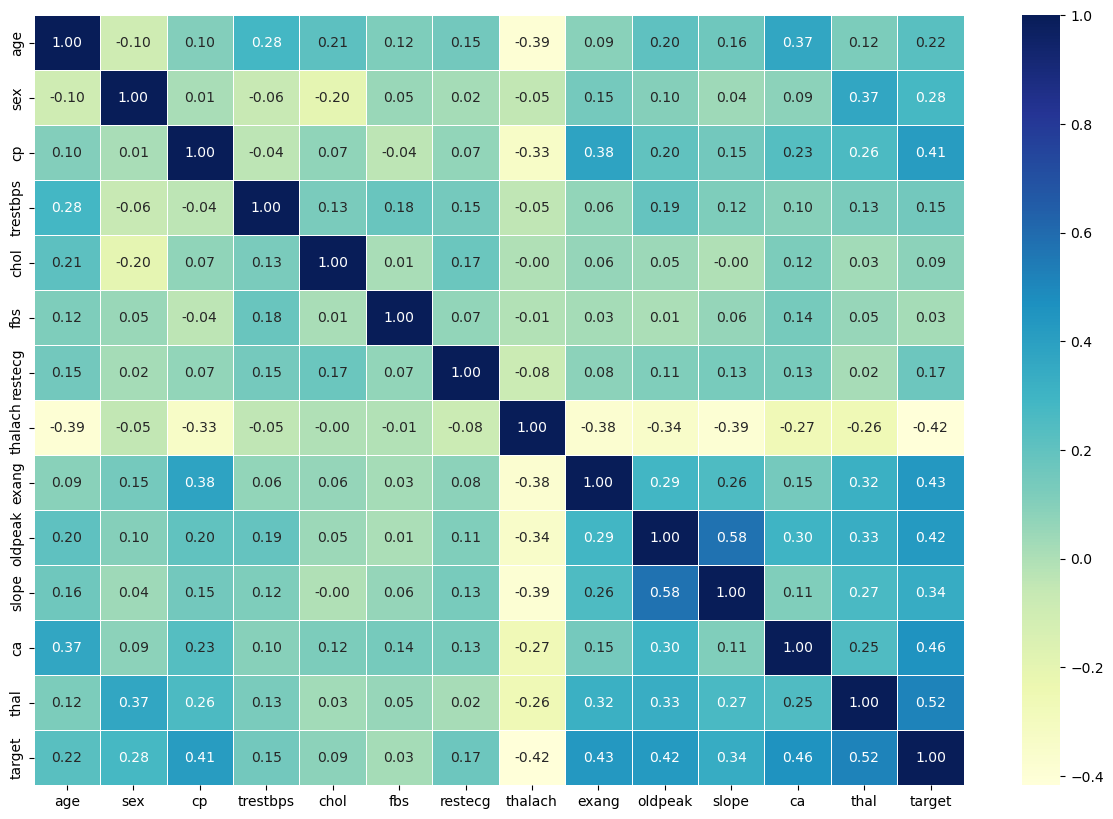

In [19]:
corr_matr = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matr,
                annot = True, 
                linewidths= 0.5, 
                fmt = ".2f", 
                cmap = "YlGnBu")

## Modelling 

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [21]:
#Split data into X and y 

X = df.drop("target", axis=1)
y = df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1


In [22]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64

In [23]:
#Split into data train and test tests 

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2)



In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,29,1,1,130,204,0,2,202,0,0.0,0,0,1
202,57,1,2,150,126,1,0,173,0,0.2,0,1,3
196,69,1,0,160,234,1,2,131,0,0.1,1,1,1
75,65,0,2,160,360,0,2,151,0,0.8,0,0,1
176,52,1,3,108,233,1,0,147,0,0.1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,1,192,283,0,2,195,0,0.0,0,1,3
71,67,1,3,125,254,1,0,163,0,0.2,1,2,3
106,59,1,3,140,177,0,0,162,1,0.0,0,1,3
270,61,1,3,140,207,0,2,138,1,1.9,0,1,3


In [25]:
y_train

132    0
202    0
196    0
75     0
176    0
      ..
188    1
71     1
106    1
270    1
102    0
Name: target, Length: 242, dtype: int64

In [26]:
#Put the models in a dictionary
models = {"Logistic Regression": LogisticRegression(), 
         "KNN": KNeighborsClassifier(), 
         "Random Forest": RandomForestClassifier()}
#Create a function to fit models
def fit_and_score_models(models, X_train,X_test,y_train,y_test):
    np.random.seed(42)
    #Make a dcit to keep model scores
    model_scores={}
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
        
    return model_scores
        

In [27]:
model_scores = fit_and_score_models(models = models, 
                                   X_train=X_train,
                                    X_test=X_test,
                                   y_train=y_train,
                                   y_test=y_test)

model_scores

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9180327868852459,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934}

## Model Comparasion

<Axes: >

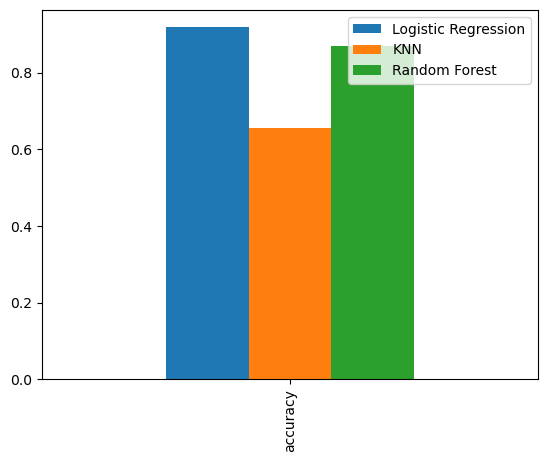

In [28]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.plot.bar()

## Hyperparamter tuning with RandomizedSearchCV

Hyperparameter tuning is the process of adjusting a model's hyperparameters (manually tuned parameters) to maximize the performance of a machine learning model. These hyperparameters are important factors that control the behavior of the model, such as learning rate, tree depth (for decision trees), C and gamma (for support vector machines).
We are goint to tune; 

* Logisticregression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [29]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparamter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 20)}

In [30]:
# Tune LOGİSTİCrEGRESSİON

np.random.seed(42)

#Setup the random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression

rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(X_test, y_test)

0.9016393442622951

To compare the LogisticRegression and Random Forest models do the same for RandomForestClassifier()

In [33]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [35]:
rs_rf.score(X_test, y_test)

0.8852459016393442

bunlara çalış: 

by hand 
RandomsizedSearchCV 
GridSearchCv

## Hyperparameter Tuning with GridSearchCv

Since our LogisticRegression model provides the best scores so far, we will try and improve the them again using GridSearchCv 


In [36]:
# Different hyperparamters for the LogisticRegression Model
log_reg_grid = {"C": np.logspace(-4, 4 ,30),
               "solver" : ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv = 5,
                         verbose=True)

# Fit the grid Hyperparamter search model 

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [37]:
#Check the best hyperparameter 

gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [38]:
# Evaluate the grid search LogisticResgression Model

gs_log_reg.score(X_test, y_test)

0.9016393442622951

In [39]:
model_scores

{'Logistic Regression': 0.9180327868852459,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934}

## Evaluting the tuned machine learning classifer, beyond accuracy
* Roc and AUC curve 
* Confusion Matrix 
* Classifcaiton report
* Precision 
* Recall
* F1-score 

and it would be great if cross-validation was used where possible.

To make comparasions and evaluate the trained model, first we need to make predictions. 

In [40]:
y_preds = gs_log_reg.predict(X_test)

In [41]:
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [42]:
y_test

179    0
228    1
111    1
246    1
60     1
      ..
249    0
104    1
300    1
193    1
184    1
Name: target, Length: 61, dtype: int64

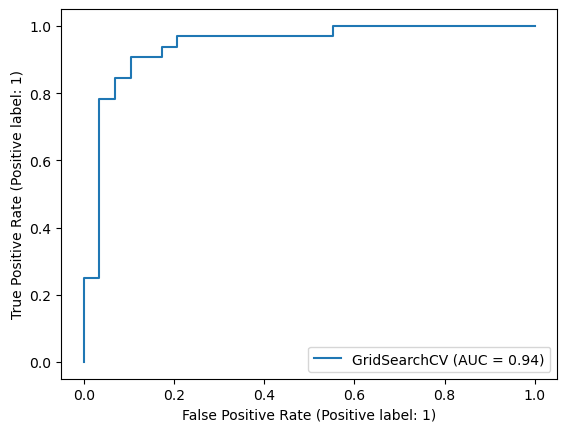

In [43]:
# Plot the ROC Curve and calculate 

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)


In [44]:
#Confusion Matrix 
print(confusion_matrix(y_test, y_preds))

[[26  3]
 [ 3 29]]


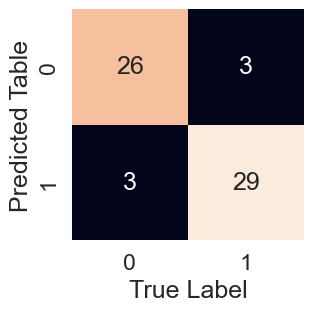

In [45]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Table")
    
plot_conf_mat(y_test,y_preds)

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## Calculate the evulation metrics using cross-validation

We are going to calculate the accuracy, precison, recall and f-1 score of our model using cross-validation and to do so we will be using  ' cross_val_score()' .

In [47]:
#Check the best heyperparamaters 
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [48]:
clf = LogisticRegression(C = 0.38566204211634725,
                        solver = "liblinear")


In [50]:
#Cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring="accuracy")
cv_acc

array([0.86885246, 0.85245902, 0.78688525, 0.81666667, 0.8       ])

In [52]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8249726775956283

In [54]:
# Cross validated precison
cv_precison = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring="precision")
cv_precison = np.mean(cv_precison)
cv_precison

0.8384652981427175

In [55]:
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8384652981427175

In [56]:
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.7764550264550264

In [57]:
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8017565388606551

<Axes: title={'center': 'Cross Validation classification metrics'}>

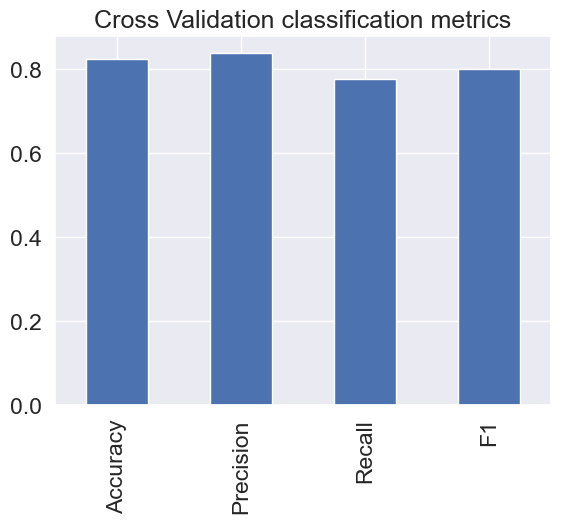

In [58]:
#Visualize the cross-validated metricies

cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title = "Cross Validation classification metrics", 
                     legend = False)


### Feature Importance 

Feature importance is another as asking "which features contributed most to the outcomes of the model and how did they contribute?" 

Finding feature importance is different for each machine learning model. 

Let's find the feature importance for our LogisticRegression model. 


In [60]:
# Fit an instance of LogisticRegression 
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.38566204211634725,
                        solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [61]:
clf.coef_

array([[-0.02851564,  0.78336235,  0.35685085,  0.01016581,  0.00484734,
        -0.2625504 ,  0.1587292 , -0.03116791,  0.56624388,  0.32390085,
         0.35277236,  1.1267513 ,  0.56897314]])

In [62]:
# Match coef's of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.028515643452786954,
 'sex': 0.7833623509327848,
 'cp': 0.35685085452088905,
 'trestbps': 0.010165813633219015,
 'chol': 0.004847340782071946,
 'fbs': -0.2625504027484151,
 'restecg': 0.15872920302635146,
 'thalach': -0.03116791036029412,
 'exang': 0.5662438766419817,
 'oldpeak': 0.32390084897822347,
 'slope': 0.35277235634346227,
 'ca': 1.1267513040921995,
 'thal': 0.5689731356200495}

<Axes: title={'center': 'Feature İmportance'}>

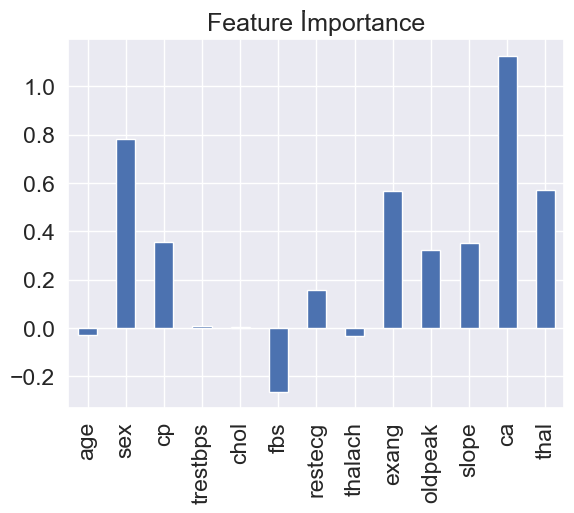

In [63]:
# Visulaze the feature importance 

feature_df = pd.DataFrame(feature_dict, index =[0])
feature_df.T.plot.bar(title = "Feature İmportance", legend = False)